# Imports and necessary preparation

In [9]:
import os
current_dir = os.getcwd() if 'current_dir' not in locals() else current_dir
print(f'Current directory: {current_dir}')

%load_ext autoreload
%autoreload 2

%cd {current_dir}/../src/data
from analysis.analyze import get_toxic_words

%cd {current_dir}
root = current_dir+"/../"

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

Current directory: /workspaces/PMLDL_Assignment1/notebooks
/workspaces/PMLDL_Assignment1/src/data
/workspaces/PMLDL_Assignment1/notebooks


# Initial data exploration

### Load dataframe from file and preprocess

#### Common preprocessing steps:
1. Simple (meaning preserves) - **used here**:
    1. Lowercasing
    1. Removing punctuation
    1. Removing numbers
    1. Removing double spaces
1. Loosing meaning - **will be considered later**:
    1. Tokenization
    1. Removing of stop words
    1. Stemming and lemmatization

In [16]:
!python {root}/src/data/preprocess_dataset.py --root={root}

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
577760


In [2]:
df = pd.read_csv(f"{root}data/raw/filtered.tsv", sep='\t').drop(columns=['Unnamed: 0'])
df_processed = pd.read_csv(f"{root}data/interim/preprocessed.csv")

##### Initial data

In [13]:
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


##### Preprocessed

In [14]:
df_processed.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox,tox_diff,ref_length,trn_length,length_difference
0,if alkar floods her with her mental waste it w...,if alkar is flooding her with psychic waste th...,0.79,0.01,0.981983,0.014195,0.968,96,95,1
1,you re becoming disgusting,now you re getting nasty,0.75,0.07,0.999039,0.065473,0.934,27,25,2
2,well we can spare your life,well we could spare your life for one,0.92,0.27,0.985068,0.213313,0.772,29,40,11
3,monkey you have to wake up,ah monkey you ve got to snap out of it,0.66,0.31,0.994215,0.053362,0.941,28,41,13
4,i have orders to kill her,i ve got orders to put her down,0.73,0.18,0.999348,0.009402,0.990,26,32,6


#### Explore the statistics

In [18]:
df_processed[
    ['ref_tox', 'trn_tox', 'tox_diff', 'ref_length', 'trn_length', 'length_difference', 'similarity', 'lenght_diff']
].describe().round(3)

,ref_tox,trn_tox,tox_diff,ref_length,trn_length,length_difference,similarity,lenght_diff
count,577777.000,577777.000,577777.000,577777.000,577777.000,577777.000,577777.000,577777.000
mean,0.940,0.036,0.905,52.539,51.160,8.795,0.758,0.158
std,0.101,0.079,0.126,37.324,37.382,9.030,0.093,0.108
min,0.500,0.000,0.500,2.000,3.000,0.000,0.600,0.000
25%,0.940,0.000,0.870,28.000,26.000,3.000,0.680,0.070
50%,0.984,0.003,0.963,43.000,41.000,6.000,0.750,0.140
75%,0.998,0.027,0.992,66.000,65.000,12.000,0.830,0.240
max,1.000,0.499,1.000,1401.000,969.000,534.000,0.950,0.400


#### Visualization

In [10]:
!python ../src/visualization/visualize.py --input_dataframe=../data/interim/preprocessed.csv --output_path=../

Figure(2000x1000)


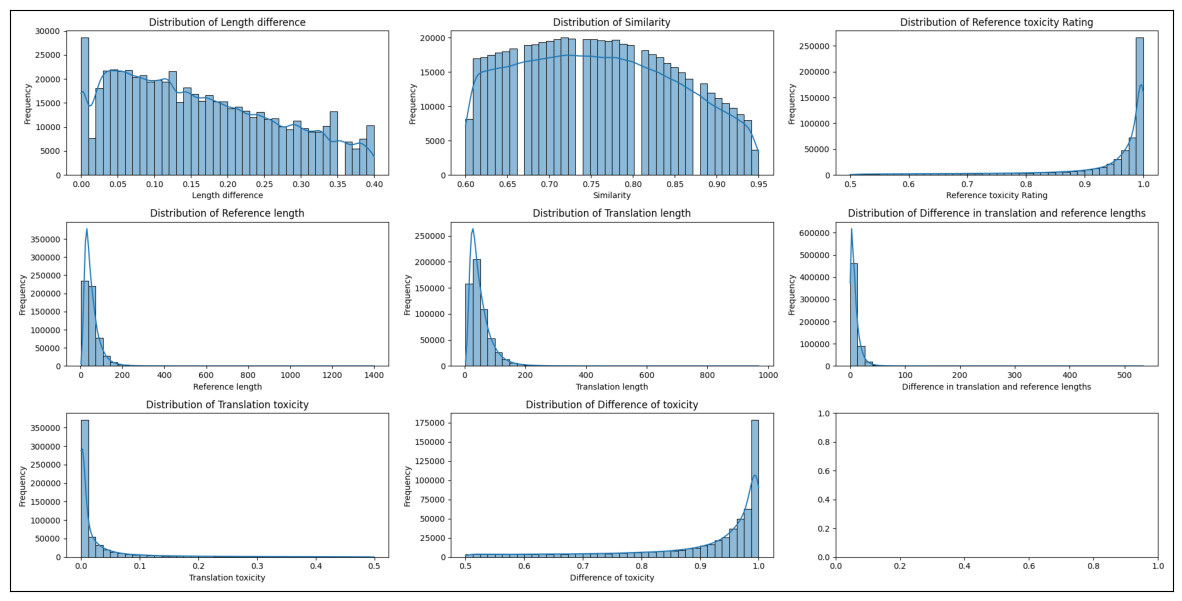

In [11]:
image = mpimg.imread(f"{root}dataset_visualization.png")
plt.figure(figsize=(15,15))
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.imshow(image, )
plt.show()

### Important notes:
1. The distributions of lengths of referenced and translated texts are nearly the same. The 75 percentile of lenght_diff (from the initial) is only 0.25 and of manual length_difference is 12 (characters)
    - Moreover, considering only sentences of length less than 100 will cover more than 75% of the dataset
1. The difference of toxicity levels of referenced and translated texts are severely skewed to the right (towards 1)
    - It is also good, since taking only a subset of 75% most toxic reference provides a good diverse (in terms of toxicity) pair of sentences which will be good for training the model.

#### Words statistics. Separate words used in toxic and translation sentences
toxic - those that do not appear in translated text but were in toxic reference

In [21]:
toxic_words, translated_words = get_toxic_words(df_processed, log=True)

Number of words in toxic dataset: 73147
Number of words in translated dataset: 79524
Number of toxic words that are not in translation: 19655


As you can see from here, the dataset of bad sentences has 7% less words than the good text contains. It may also be the evidence of the scarcity of vocabulary words when you express yourself in a bad manner.

##### Bad words. 
Disclaimer: The content of the cell below is 18+

In [22]:
top_bad_words, bottom_bad_words = list(toxic_words.most_common(18)), list(toxic_words.most_common())[-18:]
for t, b in zip(top_bad_words, bottom_bad_words):
    print(t,b)

('motherfucker', 621) ('obsolescent', 1)
('faggot', 554) ('thaks', 1)
('dicks', 355) ('thom', 1)
('scumbag', 214) ('sepulchral', 1)
('motherfuckers', 200) ('matosevic', 1)
('motherfucking', 197) ('unhomed', 1)
('fuckers', 182) ('wss', 1)
('stupidest', 168) ('scotia', 1)
('damnedest', 75) ('thiev', 1)
('damnit', 74) ('ringside', 1)
('wankers', 68) ('hooches', 1)
('arsehole', 67) ('pinstriped', 1)
('pigheaded', 65) ('sexualitywill', 1)
('faggots', 63) ('witched', 1)
('sissies', 53) ('appetitefor', 1)
('shitheads', 37) ('cohesiveness', 1)
('shins', 36) ('memorised', 1)
('electrocute', 31) ('interstitial', 1)


As you can see. There aren't some bad words here. 

For example, the word 'fuck' is preserved in translation. Let's see where it appears in the translated dataset

In [23]:
common_bad_words_in_english = ['fuck', 'hell', 'asshole', 'bitch', 'bastard', 'damn', 'piss', 'damn']
for word in common_bad_words_in_english:
    print(f'{word} in translated text appears: {translated_words[f"{word}"]} times')


fuck in translated text appears: 114 times
hell in translated text appears: 14495 times
asshole in translated text appears: 14 times
bitch in translated text appears: 24 times
bastard in translated text appears: 69 times
damn in translated text appears: 1076 times
piss in translated text appears: 710 times
damn in translated text appears: 1076 times


In [24]:
# sort first by toxicity of "good" sentences ('translation)
df_sorted = df_processed.sort_values(by=['trn_tox'], ascending=[True])[['translation', 'trn_tox', 'reference', 'ref_tox']].round(3).values

bad_rows = []
for row in df_sorted:
    if ('fuck' in row[0]):
        bad_rows.append(row)
        
print('Translated sentence, its score, reference sentence and its score:')        
print(*bad_rows[10:20], sep='\n')

Translated sentence, its score, reference sentence and its score:
['fuckyou roger' 0.001 'fuck you roger' 1.0]
['fuckyou man' 0.001 'shit man' 1.0]
['now i paid you a lot offucking money to help put this together' 0.001
 'now i paid you a bunch of fucking money to take care of' 0.988]
['fuckyou finch' 0.001 'fuck you finch' 1.0]
['it don t fuck up the baby immunities' 0.001
 'she doesn t fuck with her immunity' 0.993]
['you got it there s going to be a lot offucking trouble ifthis car gets wet'
 0.001 'there s gonna be a lot of fucking trouble if this car is wet'
 0.982]
['and i am not planning to let anything fuck that up' 0.001
 'and i m not planning to let anything get fucked up' 0.988]
['not fuck things up' 0.001 'just don t fuck up' 0.991]
['i d never fuck that up' 0.002 'i ll never fuck up' 0.956]
['fuckyour mersin' 0.002 'fucking mersin' 1.0]


Apparently, the sentence different in one space is considered 99% less toxic.

Examples: 
- **'fuckyou finch'** with toxicity 0.001 and **'fuck you finch'** with almost 1
- **'fuckyou raheem'** - 0.001 & **'fuck you raheem'** - 1.0. From initial dataset: 'Fuckyou, Raheem!' - 0.0006 & 'fuck you, Raheem!' - 1
- **'fuckyou man'** - 0.001 & **'shit man'** - 1.0

#### Conclusion:

Some words, such as 'fuck' are not considered as 100% toxic. There are many sentences that are containing such words and assessed with very low toxicity rating (below 0.001).

It means that some single bad words are not actually bad. The phrase is what is much more important. 

Example: 
- fuck up / get fucked up (99% toxic) -> fuck things/that up (less than 1%)


While some words, such as the most popular "motherfucker" has to be avoided by all price

All this will be took into account by the model while training.


### 